In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
train = pd.read_csv("C:\\Users\\sadis\\Desktop\\inceptez\\Statistics\\ML\\Assignments\\Titanic\\train.csv")
test = pd.read_csv("C:\\Users\\sadis\\Desktop\\inceptez\\Statistics\\ML\\Assignments\\Titanic\\test.csv")
submission = pd.read_csv("C:\\Users\\sadis\\Desktop\\inceptez\\Statistics\\ML\\Assignments\\Titanic\\Sample_Submission.csv")

In [3]:
train.columns.difference(test.columns)

Index(['Survived'], dtype='object')

In [4]:
print("Train shape:",train.shape)
print("Test shape:",test.shape)

Train shape: (891, 12)
Test shape: (418, 11)


In [5]:
data = pd.concat([train, test],axis = 0)

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1309 non-null   float64
 7   Embarked  1309 non-null   object 
 8   Cabin_1   1309 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 134.6+ KB


In [39]:
data['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [43]:
data['Age']= round(data['Age'])

In [44]:
data['Age'].value_counts()

24.0    312
22.0     44
30.0     42
18.0     42
21.0     41
       ... 
66.0      1
67.0      1
74.0      1
76.0      1
80.0      1
Name: Age, Length: 73, dtype: int64

In [45]:
data['SibSp'].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [46]:
data['Parch'].value_counts()

0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: Parch, dtype: int64

In [47]:
data['Ticket'].value_counts()

CA. 2343    11
1601         8
CA 2144      8
347077       7
347082       7
            ..
330877       1
7935         1
110489       1
113044       1
350050       1
Name: Ticket, Length: 929, dtype: int64

In [48]:
data['Cabin'].value_counts()

G6                 698
D                  258
C23 C25 C27         73
B57 B59 B63 B66      5
F33                  4
                  ... 
C28                  1
C103                 1
C95                  1
C70                  1
E45                  1
Name: Cabin, Length: 186, dtype: int64

In [52]:
data['Cabin_1']= data['Cabin'].apply(lambda x: x[0:1])

In [51]:
data.drop(['Cabin_2'], axis=1, inplace=True)

In [53]:
data['Cabin_1'].value_counts()

G    698
D    300
C    161
B     65
E     41
A     22
F     21
T      1
Name: Cabin_1, dtype: int64

In [56]:
data['Fare'] = round(data['Fare']).value_counts()

In [83]:
data['Fare'] = data.groupby(['Pclass']).Fare.transform(lambda x:x.fillna(x.median()))

In [25]:
data['Cabin'] = data.groupby(['Pclass', 'Fare']).Cabin.transform(lambda x:x.fillna(x.mode()[0]))

In [27]:
#Age 
#Fill using Mode value (This is a another way)
data['Age'].fillna(data['Age'].value_counts().index[0],inplace = True)

In [29]:
data['Embarked'].fillna(data['Embarked'].value_counts().index[0],inplace = True)

In [35]:
X_numerical = data.select_dtypes(include=np.number).drop(columns=['Survived'])

In [36]:
X_numerical.shape

(1309, 6)

In [37]:
vif_data = pd.DataFrame()
vif_data['features']=X_numerical.columns
vif_data

,features
0,PassengerId
1,Pclass
2,Age
3,SibSp
4,Parch
5,Fare


In [38]:
vif_data['VIF'] = [variance_inflation_factor(X_numerical.values,i)for i in range(len(X_numerical.columns))]
vif_data

,features,VIF
0,PassengerId,3.627873
1,Pclass,4.369391
2,Age,4.157899
3,SibSp,1.493562
4,Parch,1.463781
5,Fare,1.825706


In [85]:
data_ = pd.get_dummies(data,drop_first = True)

In [62]:
numerical_data = data.select_dtypes(include = np.number).columns
categorical_data = data.select_dtypes(exclude = np.number).columns

In [63]:
categorical_data

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Cabin_1'], dtype='object')

In [64]:
data.drop(['Name','Cabin', 'Ticket'], axis = 1, inplace=True)

In [66]:
data_.shape

(1309, 17)

In [67]:
data.drop(['PassengerId'], axis = 1, inplace=True)

In [86]:
train_df = data_.loc[data_['Survived'].isna()==False]
test_df = data_.loc[data_['Survived'].isna()==True]


X_main_test = test_df.drop(['Survived'],axis = 1)

In [76]:
X.shape

(891, 16)

In [77]:
y.shape

(891,)

In [87]:
X = train_df.drop(['Survived'],axis = 1)
y = train_df['Survived']

In [88]:
from sklearn.model_selection import train_test_split,cross_validate
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size = 0.2,random_state=2)

In [89]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)
X_main_test_sc = sc.transform(X_main_test)

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#train_model 
clf_0 = LogisticRegression().fit(train_x,train_y)

In [91]:
pred_y_0 = clf_0.predict(test_x)
accuracy_score(pred_y_0,test_y)

0.8044692737430168

<AxesSubplot:>

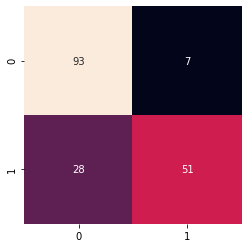

In [92]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm = confusion_matrix(test_y,pred_y_0)

sns.heatmap(cm,square = True,annot = True,cbar= False)

In [94]:
pred_test = clf_0.predict(X_main_test_sc)

predictions_test_final = ['Y' if y>0.5 else 'N' for y in pred_test]

submission['Survived'] = predictions_test_final
submission.to_csv("C:\\Users\\sadis\\Desktop\\inceptez\\Statistics\\ML\\Assignments\\Titanic\\submission_LR.csv",index = False)